In [2]:
# check scanpy first 

import scanpy #or import scanpy as sc

# if you got the error, then dowloand the scanpy:
!pip install scanpy

import anndata
import scipy 
import time
t0start = time.time()

import pandas
import numpy
import os
import sys

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70
# plt.style.use('dark_background')

import seaborn as sns

from sklearn.decomposition import PCA

In [5]:
# Define and load the h5ad data file
file_path = r"C:\Users\Admin\Desktop\Hw3covid_Data_AllCells.h5ad"
if 1:  
    t0 = time.time()
    adata = scanpy.read(file_path)
    print('%.1f'%(-t0+time.time()), ' seconds passed' )
    print(type(adata.X))
    adata
    
# Check the time for seeing hpw many second passed whike loading this h5ad data file

3.3  seconds passed
<class 'scipy.sparse._csr.csr_matrix'>


In [6]:
adata

AnnData object with n_obs × n_vars = 116313 × 34546
    obs: 'disease__ontology_label', 'Cell type', 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'group', 'cell_type_intermediate', 'cell_type_fine', 'initial_clustering', 'age', 'sex', 'recorded_race', 'recorded_ethnicity', 'intubation_days', 'interval_death_symptoms_onset_days', 'pmi_h'
    uns: 'Brief Info', 'Cancer Cells', 'Cell Count', 'Cell type', 'Comment', 'Counts or preprocessing', 'First author', 'GSE', 'Last author', 'Link', 'Organism', 'Paper Link', 'Paper Title', 'Source', 'Technology', 'Year'

In [7]:
print('Look at count matrix. We see integers - that confirms - data are raw-counts, not preprocessed expressions')
print(adata.X.sum(), type(adata.X), numpy.asarray(adata.X.sum(axis = 1)).ravel()[:10])
scanpy.pp.calculate_qc_metrics(adata,  percent_top=None, log1p=False, inplace=True)
    # Calculates statistics on both cells and genes:
    # for cells: 'n_genes_by_counts', 'total_counts'
    # for genes: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    # If parameter: inplace = True, then these statistics will be added to adata_EC

Look at count matrix. We see integers - that confirms - data are raw-counts, not preprocessed expressions
174998000.0 <class 'scipy.sparse._csr.csr_matrix'> [17690. 13828. 12490. 12304. 11976. 11331. 10404. 10442.  9804.  9332.]


In [8]:
# We are going to normalise the data. Let's make sure we can still access the original (raw) data
adata
adata.raw = adata

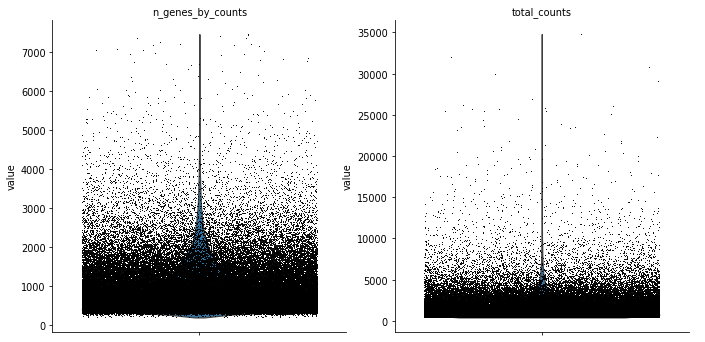

In [9]:
scanpy.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True)

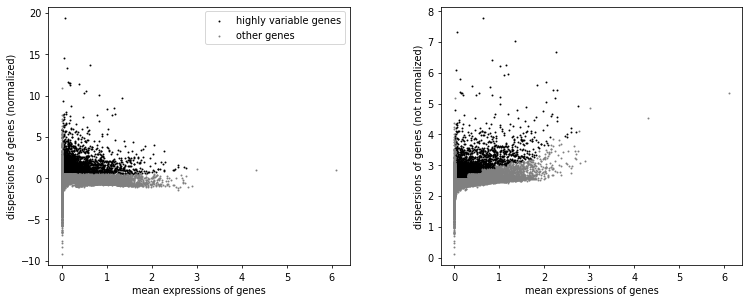

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\preprocessing\_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 116313 × 3686
    obs: 'disease__ontology_label', 'Cell type', 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'group', 'cell_type_intermediate', 'cell_type_fine', 'initial_clustering', 'age', 'sex', 'recorded_race', 'recorded_ethnicity', 'intubation_days', 'interval_death_symptoms_onset_days', 'pmi_h', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Brief Info', 'Cancer Cells', 'Cell Count', 'Cell type', 'Comment', 'Counts or preprocessing', 'First author', 'GSE', 'Last author', 'Link', 'Organism', 'Paper Link', 'Paper Title', 'Source', 'Technology', 'Year', 'log1p', 'hvg'

In [10]:
scanpy.pp.filter_cells(adata, min_genes=200) # Remove cells with more than 200 and less than 8000 detected genes
scanpy.pp.filter_cells(adata, max_genes=8000) # Remove cells with more than 200 and less than 8000 detected genes

scanpy.pp.filter_genes(adata, min_cells=3) # Remove genes detected in less than 3 cells
adata
#if 0: 
#    # Remove cells with less than 5000 counts
#    adata = adata[adata.obs.n_genes_by_counts <5000, :]    
#    adata
    
scanpy.pp.normalize_total(adata, target_sum=1e4) # normalize with counts per million
scanpy.pp.log1p(adata) #take the log(1+x) of each value

if 0:
    # sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
    sc.pp.regress_out(adata, ['total_counts'])

scanpy.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
scanpy.pl.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]

scanpy.pp.scale(adata, max_value=10) # subtract the mean expression value and divide by the standard deviation
adata

In [18]:
# UMAP
# Explain these codes.
scanpy.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
scanpy.tl.umap(adata)

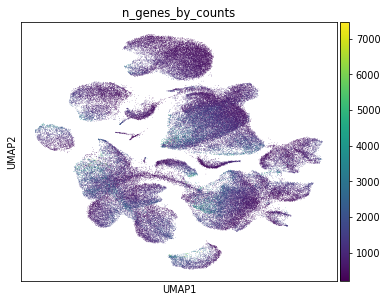

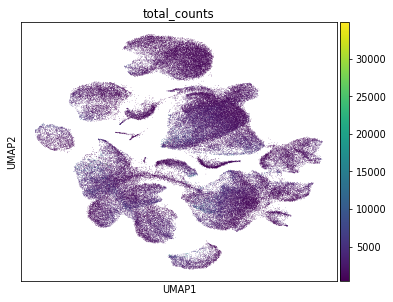

In [27]:
# UMAP calculation
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

# n_genes_by_counts visualization
sc.pl.umap(adata, color='n_genes_by_counts', title='n_genes_by_counts')

# total_counts visualization
sc.pl.umap(adata, color='total_counts', title='total_counts')


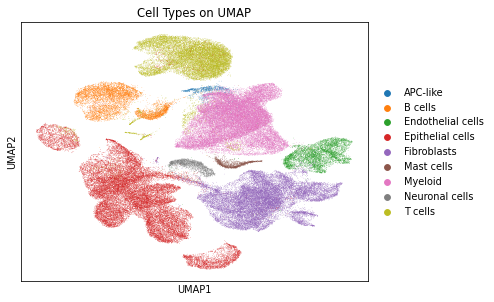

In [28]:
# Ensure cell_type is in adata.obs
if 'Cell type' not in adata.obs:
    print("Cell type information is missing in adata.obs['Cell type']. Please add it!")

# UMAP visualization by cell type
sc.pl.umap(adata, color='Cell type', title='Cell Types on UMAP')


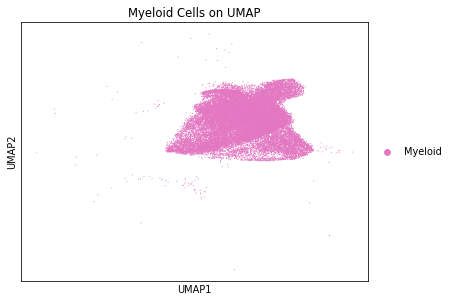

In [29]:
# Filtering to select myeloid cells
if 'Cell type' in adata.obs:
    # Selection of myeloid cells
    myeloid_adata = adata[adata.obs['Cell type'] == 'Myeloid', :]

    # Visualize only Myeloid cells on UMAP
    sc.pl.umap(myeloid_adata, color='Cell type', title='Myeloid Cells on UMAP')
else:
    print("Cell type bilgisi bulunamadı. Lütfen adata.obs['Cell type'] değerini kontrol edin!")
